In [36]:
#import libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk. stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [3]:
ps=PorterStemmer()

In [4]:
df=pd.read_csv("spam_ham_dataset.csv")

In [5]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
# remove unnecessary columns
df=df.drop(['Unnamed: 0','label_num'],axis=1)

In [7]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [8]:
#shape of the data
df.shape

(5171, 2)

In [9]:
# check duplicated values
df.duplicated().sum()

178

In [10]:
# To drop dulicated values
df=df.drop_duplicates(keep='first')

In [11]:
#check the null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [12]:
df['label'].value_counts()

ham     3531
spam    1462
Name: label, dtype: int64

In [13]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    3531   3531  Subject: enron methanol ; meter # : 988291\r\n...    1
spam   1462   1462  Subject: photoshop , windows , office . cheap ...    1

([<matplotlib.patches.Wedge at 0x10f762fd720>,
 [Text(-0.6664987604061641, 0.8750882254818922, 'ham'),
  Text(0.6664986784744886, -0.8750882878840056, 'spam')],
 [Text(-0.3635447784033622, 0.4773208502628502, '70.72'),
  Text(0.36354473371335744, -0.4773208843003666, '29.28')])

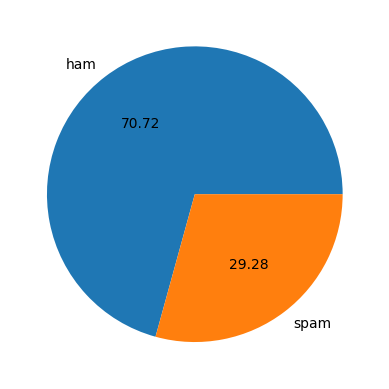

In [14]:
# To check label values in the data set
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [15]:
# we can see dataset is imabalanced ham is high and spam is low in th pie chart
#we can  now solve imbalanced dataset to drop some rows in ham data set
df_spam=df[df['label']=='spam']
df_ham=df[df['label']=='ham']
df_ham_down=df_ham.sample(df_spam.shape[0])

In [16]:
df_ham_down.shape

(1462, 2)

In [18]:
# To concat two datasets in one data frame
final_df=pd.concat([df_ham_down,df_spam])

In [19]:
final_df.head()

,label,text
2908,ham,Subject: re : meter 984229 - roos common point...
2589,ham,Subject: big cowboy - additional production\r\...
4132,ham,Subject: nomination - eastrans - 3 / 7 / 2000\...
4800,ham,Subject: mips\r\ncheryl jones has just left me...
420,ham,Subject: re : noms / actual flow for 4 / 09 / ...


In [20]:
# if dataset is balance
final_df['label'].value_counts()

ham     1462
spam    1462
Name: label, dtype: int64


# Data preprocessing
removing special characters and numbers,punctuations
lower case
removing stopwords
stemming


In [21]:
def preprocessing(text):
    text=''.join(re.sub("[^a-zA-Z]",' ',text)).replace('Subject','').lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i not in stopwords.words('english'):
            y.append(ps.stem(i))
    return ' '.join(y)

    
    

In [22]:
df['cleaned_text']=df['text'].apply(preprocessing)

In [ ]:
#df['text']=df['text'].apply(lambda x:''.join(re.sub("[^a-zA-Z]",' ',x)).replace('Subject','').lower())
#r=''.join(re.sub("[^a-zA-Z]",' ',df['text'][0])).replace('Subject','').lower(

In [23]:
preprocessing(df['text'][0])

'enron methanol meter follow note gave monday preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [24]:
df['label_num']=df['label'].apply(lambda x:1 if x=='spam' else 0)

In [25]:
df.head()

,label,text,cleaned_text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,enron methanol meter follow note gave monday p...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",hpl nom januari see attach file hplnol xl hpln...,0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",neon retreat ho ho ho around wonder time year ...,0
3,spam,"Subject: photoshop , windows , office . cheap ...",photoshop window offic cheap main trend abas d...,1
4,ham,Subject: re : indian springs\r\nthis deal is t...,indian spring deal book teco pvr revenu unders...,0


In [26]:
cv=CountVectorizer()
x=cv.fit_transform(df['cleaned_text']).toarray()

In [27]:
x.shape

(4993, 37887)

In [28]:
y=df['label_num']

In [29]:
y.shape

(4993,)

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [31]:
X_train.shape

(3495, 37887)

In [32]:
X_test.shape

(1498, 37887)

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
import numpy as np

In [34]:
models={
    'GaussianNB':GaussianNB(),
    'MultinomialNB':MultinomialNB(),
    'BernoulliNB':BernoulliNB()
}

In [37]:
for name,model in models.items():
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    accuracy=metrics.accuracy_score(Y_test,Y_pred)
    confusion=metrics.confusion_matrix(Y_test,Y_pred)
    precision=metrics.precision_score(Y_test,Y_pred)
    print(f'{name} accuracy:{accuracy}')
    print(f'{name} confusion_matrix:{confusion}')
    print(f'{name} precision_score:{precision}')

GaussianNB accuracy:0.9586114819759679
GaussianNB confusion_matrix:[[1030   17]
 [  45  406]]
GaussianNB precision_score:0.9598108747044918
MultinomialNB accuracy:0.9746328437917223
MultinomialNB confusion_matrix:[[1026   21]
 [  17  434]]
MultinomialNB precision_score:0.9538461538461539
BernoulliNB accuracy:0.8311081441922563
BernoulliNB confusion_matrix:[[1017   30]
 [ 223  228]]
BernoulliNB precision_score:0.8837209302325582


In [39]:
from sklearn import metrics
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
pr=gnb.predict(X_test)
metrics.accuracy_score(Y_test,pr)

0.9586114819759679

# Conclusion

The GaussianNb model gives good accuracy of this dataset

# Building a Predictive System

 #if spam means 1 and ham means 0
1)The Mail is taken from the Dataset

In [40]:
Mail = ["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."]
final_data = cv.transform(Mail)

In [44]:
final_prediction =gnb.predict(final_data.toarray())
if (final_prediction[0]==0):
  print("The mail is Ham(not spam)")
else:
  print("The mail is Spam")

The mail is Ham(not spam)


2)Mail1 is user input Mail

In [45]:
Mail1 = [input("Paste the text of the mail here : ")]  # Taking user input
final_data1 = cv.transform(Mail1)

final_prediction1 = model.predict(final_data1.toarray())
print(final_prediction1)
if (final_prediction1[0]==0):
  print("The mail is Ham(not spam)")
else:
    print("the mail is Spam")

Paste the text of the mail here : your resume selected at coders cave
[0]
The mail is Ham(not spam)
